# This notebook is to evaluate embedding derived from networks

# Table of contents
## <a href='#Evaluation-1:-How-do-the-embeddings-look-using-different-size-of-subnetworks?'>1. Evaluate embeddings from different subnetworks</a>
### <a href='#Evaluation-1.1:-How-much-is-the-overlap-between-the-embedding-clusters-from-different-subnetworks'>1.1 How much is the overlap between the embedding clusters that came from different subnetworks?</a>
### <a href='#Evaluation-1.2:-How-much-do-cluster-and-phenotype-correlation-change-when-subnetworks-(vs-whole-network)-were-used-for-embedding?'>1.2 How much do cluster and phenotype correlation change in the embedding that came from whole vs subnetwork?</a>
## <a href='#Evaluation-2:-How-do-the-embeddings-look-using-different-node2vec-parameters?'>2. How do embedding change when different node2vec parameters were used?</a>
### <a href='#Evaluation-2.1:-How-much-do-%-significant-genes-change-in-each-cluster-when-different-parameters-were-used-for-embedding?'>2.1 Evaluate changes in the embeddings by % significant genes in each cluster</a>
### <a href='#Evaluation-2.2:-How-much-do-cluster-and-phenotype-correlation-change-when-different-subnetworks-were-used-for-embedding?'>2.2 Evaluate changes in the embeddings by cluster and phenotype correlation</a>
## <a href='#Evaluation-3:-How-do-the-n_clusters-in-K-means-affect-cluster-and-phenotype-correlation?'>3 How do n_clusters in K means affect cluster and phenotype correlation?</a>
### <a href='#Evaluation-3.1:-How-much-do-%-significant-genes-change-in-each-cluster-when-different-clusters-were-used-for-k-means?'>3.1 Evaluate changes in the clusters by % significant genes in each cluster</a>
### <a href='#Evaluation-3.2:-How-much-do-cluster-and-phenotype-correlation-change-when-different-clusters-were-used-for-k-means?'>3.2 Evaluate changes in the clusters by cluster and phenotype correlation</a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import networkx as nx
from scipy.stats import ttest_ind
from sklearn.metrics import normalized_mutual_info_score as nmi
from functions.subset_network import subset_network
from functions.eda_functions import *
from functions.network_embedding import network_embedding
from functions.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
tom_df = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\Kapoor_TOM.csv', index_col = 0) 

In [5]:
expression_meta = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\expression_meta.csv', low_memory = False)

# Evaluation 1: How do the embeddings look using different size of subnetworks?

In [35]:
tom_df = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\Kapoor_TOM.csv', index_col = 0) 

In [140]:
subset_G = []
subset_df = []
for weight in [0.218, 0.24, 0.278]:
    subset, G = subset_network(tom_df, weight, 0.98)
    subset_df.append(subset)
    subset_G.append(G)
    emb_df = network_embedding(G, 16, 100, 10, 'C:/Users/bbche/Documents/GitRepos/assist/data', weight)

Number of edges left: 10100.0


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.62it/s]


embedding data saved
Number of edges left: 4967.0


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.06it/s]


embedding data saved
Number of edges left: 1092.0


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.00it/s]


embedding data saved


## Evaluation 1.1: How much is the overlap between the embedding clusters from different subnetworks

### Evalutaion 1.1a: Jaccard to compare cluster similarity

In [49]:
os.chdir(r'C:\Users\bbche\Documents\GitRepos\assist\data')
subset_kmeans = []
for file in ['embedded_len16_walk100_0.218.csv', 'embedded_len16_walk100_0.24.csv', 'embedded_len16_walk100_0.278.csv']:
    emb = pd.read_csv(file, index_col = 0)
    subset_kmeans.append(run_kmeans(emb, 10))

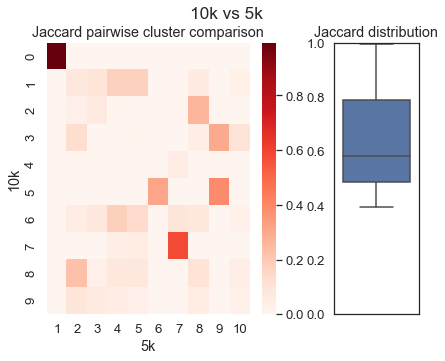

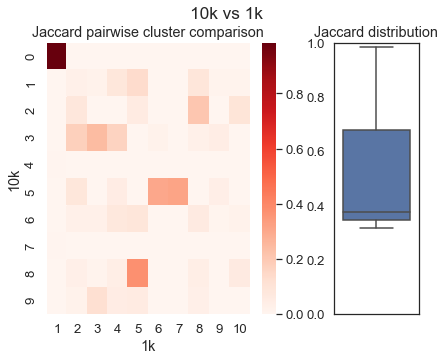

In [4]:
cluster_jaccard(subset_kmeans[0], subset_kmeans[1], 'kmean_label', ['10k','5k'], top = 3)
cluster_jaccard(subset_kmeans[0], subset_kmeans[2], 'kmean_label', ['10k','1k'], top = 3)

### Evalutaion 1.1b: NMI to compare cluster similarity

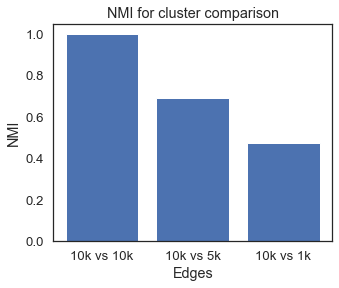

In [5]:
plot_cluster_nmi_comparison(subset_kmeans[0], subset_kmeans, 
                            'kmean_label', ['10k vs 10k', '10k vs 5k', '10k vs 1k'])

## Evaluation 1.2: How much do cluster and phenotype correlation change when subnetworks (vs whole network) were used for embedding?

### Evaluation 1.2a: Measure percentage of genes in each cluster that are significantly variable for specific traits

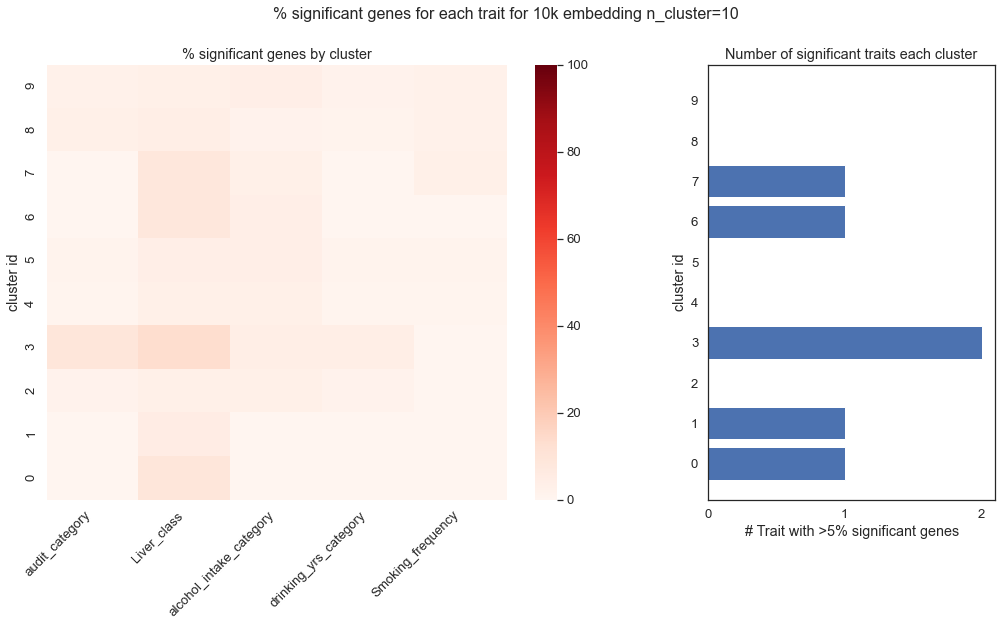

In [50]:
# this takes like 20-30 min to run unless the nodes with degree=1 are cut out. The 1.2b method is a lot faster for the same type of evaluation
plot_sig_perc(subset_kmeans[0], 'kmean_label', '10k embedding n_cluster=10') # only ran 10k embedding but could run on 5k and 1k embedding as well

### Evaluation 1.2b: Measure cluster and alcohol phenotype correlation

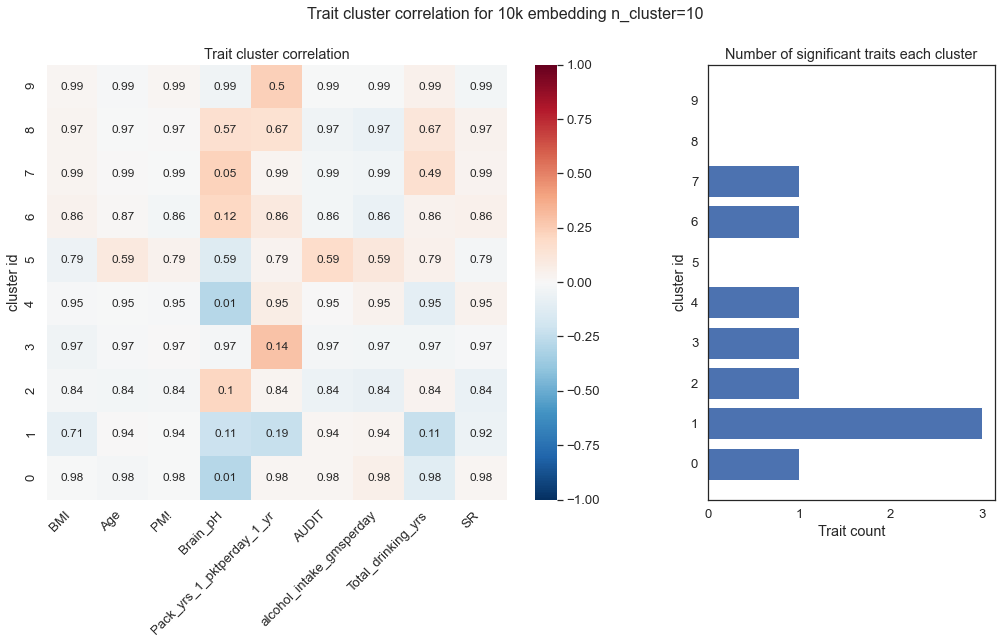

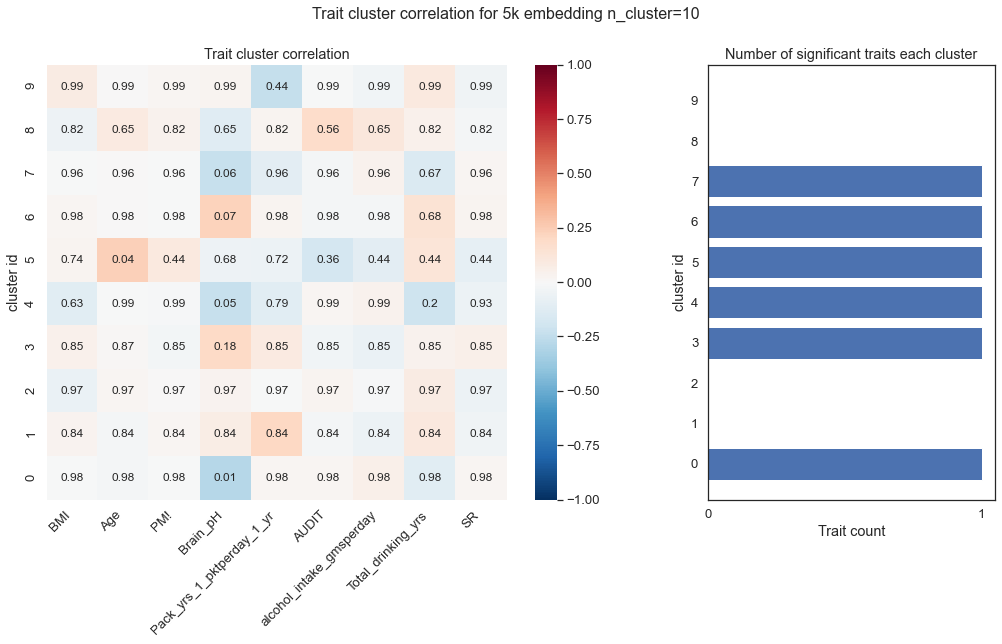

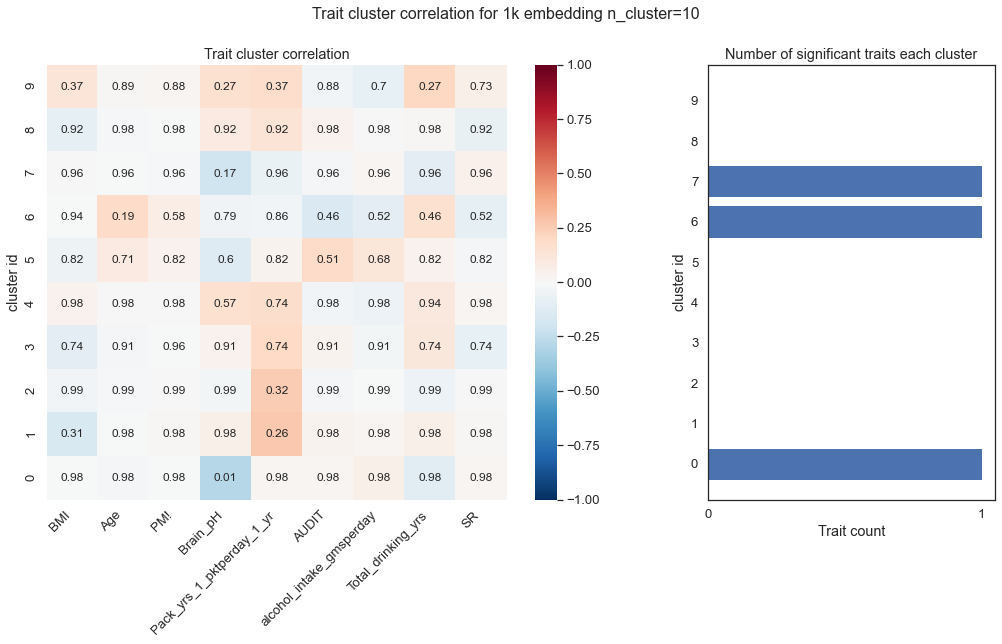

In [52]:
emb_names = ['10k embedding n_cluster=10', '5k embedding n_cluster=10', '1k embedding n_cluster=10']
for i, kmeans in enumerate(subset_kmeans):
    cluster_phenotype_corr(kmeans, 'kmean_label', emb_names[i])

# Evaluation 2: How do the embeddings look using different node2vec parameters?

In [37]:
# 3x3 sets of parameters for embedding
kmeans_list = []
parameters = []
for length in [4, 16, 64]:
    for num_walk in [100, 300, 500]:
        emb_df = network_embedding(subset_G[1], length, num_walk, 10, 'C:/Users/bbche/Documents/GitRepos/assist/data', '10k') # use the network with 5k edges as a test (less computationally intensive)
        kmeans_list.append(run_kmeans(emb_df, 10)) # run k means 
        parameters.append(f'length={length},num_walk={num_walk}') # add the parameter name to the parameters list

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.24it/s]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 300/300 [00:28<00:00, 10.55it/s]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 500/500 [00:44<00:00, 11.12it/s]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.55it/s]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 300/300 [01:25<00:00,  3.52it/s]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 500/500 [02:24<00:00,  3.46it/s]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 100/100 [01:45<00:00,  1.05s/it]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 300/300 [05:24<00:00,  1.08s/it]


embedding data saved


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 500/500 [09:54<00:00,  1.19s/it]


embedding data saved


## Evaluation 2.1: How much do % significant genes change in each cluster when different parameters were used for embedding?

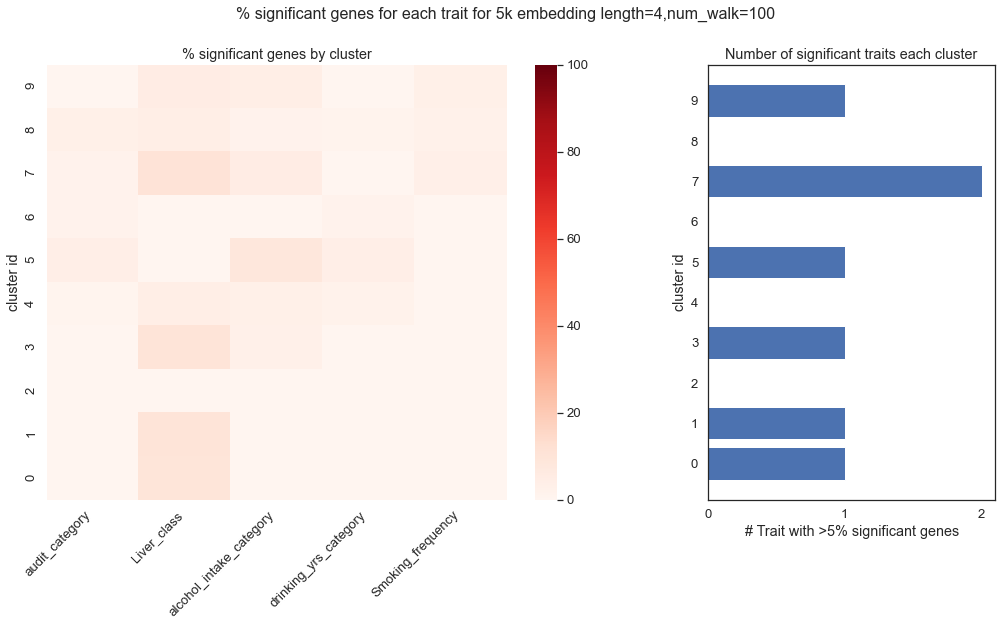

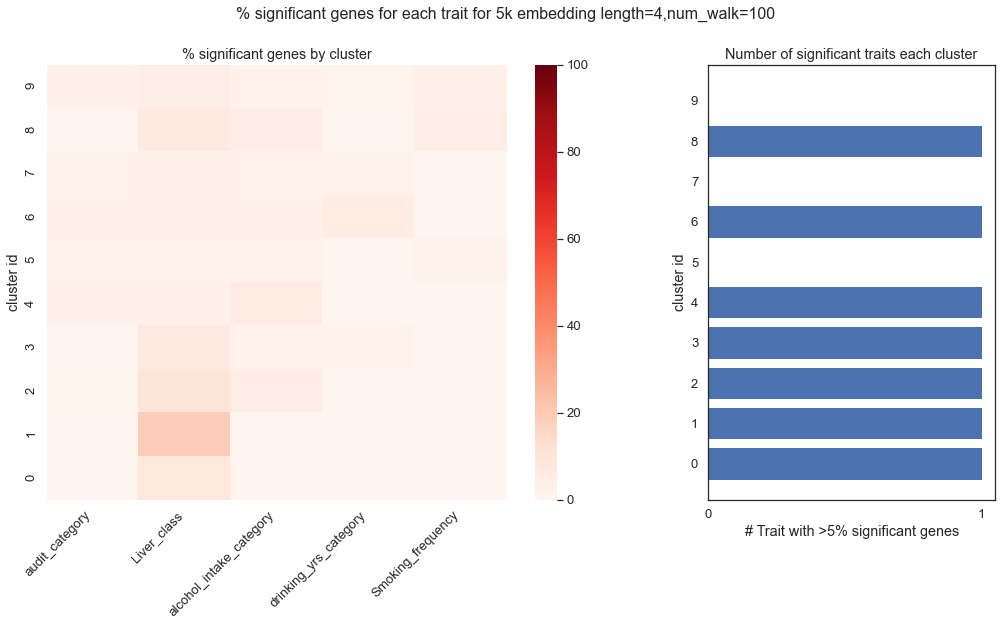

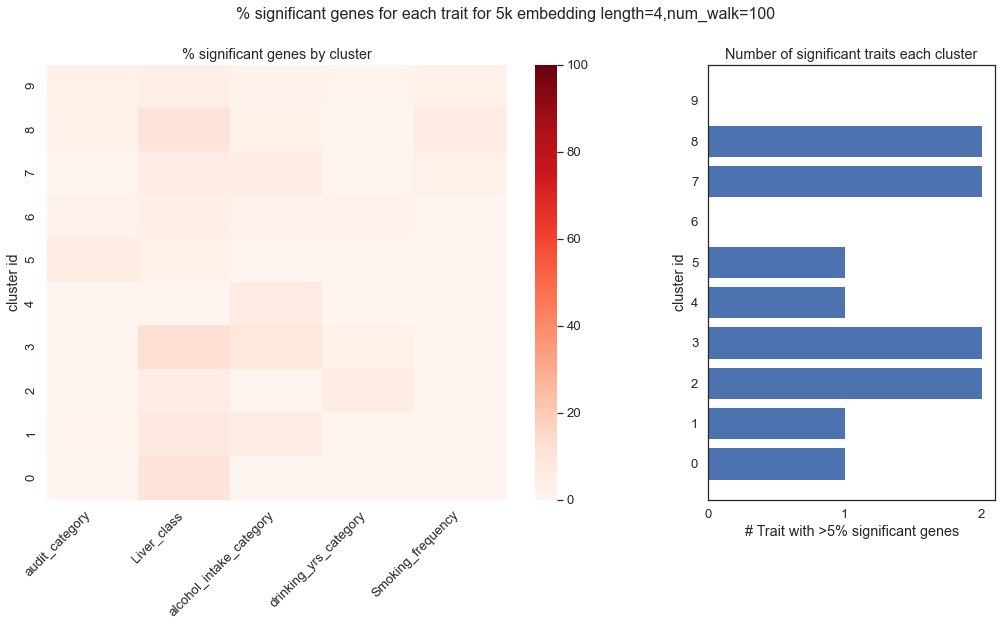

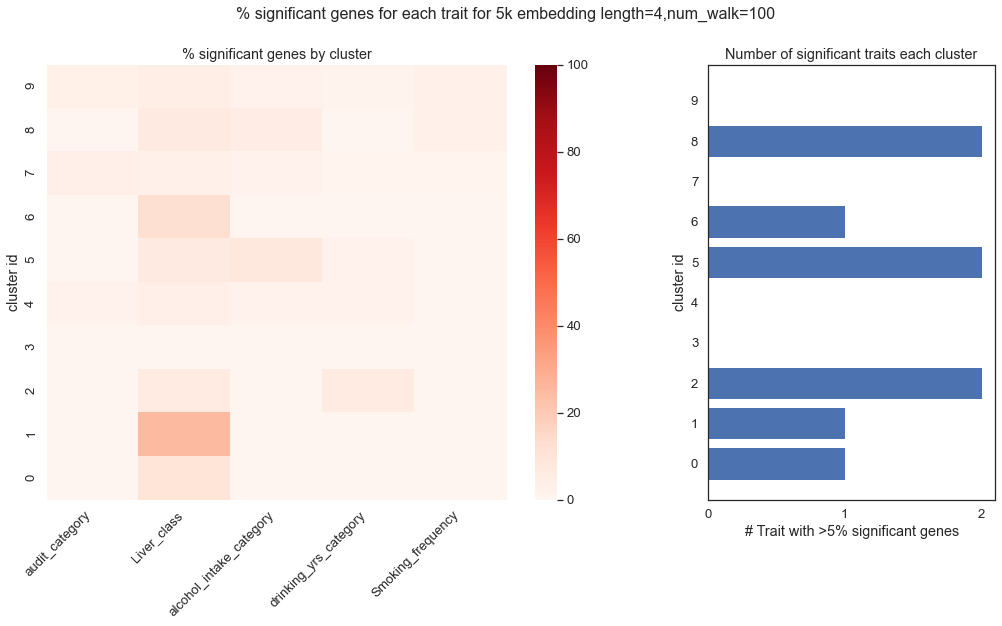

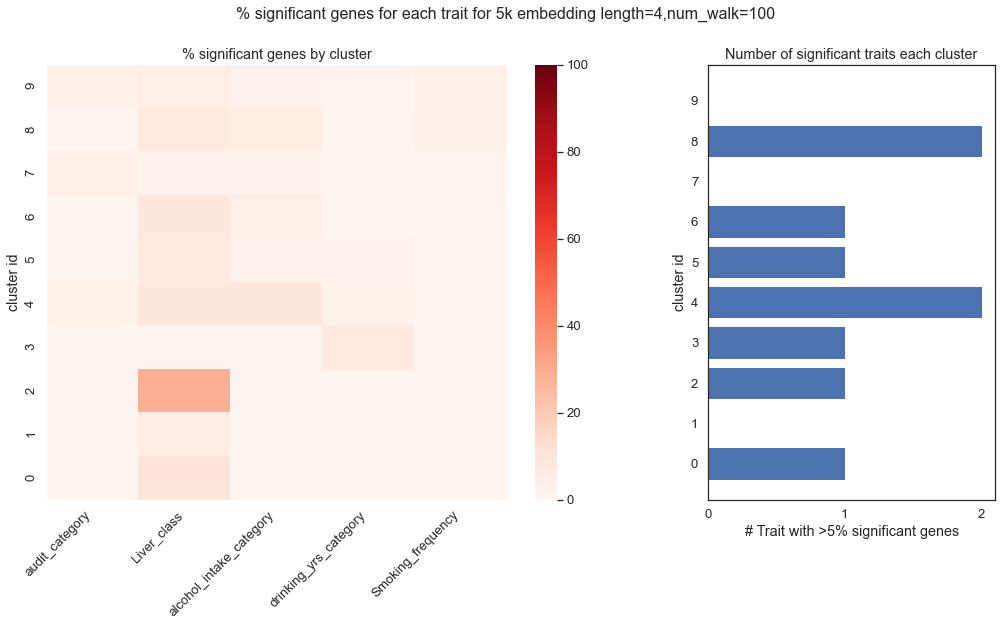

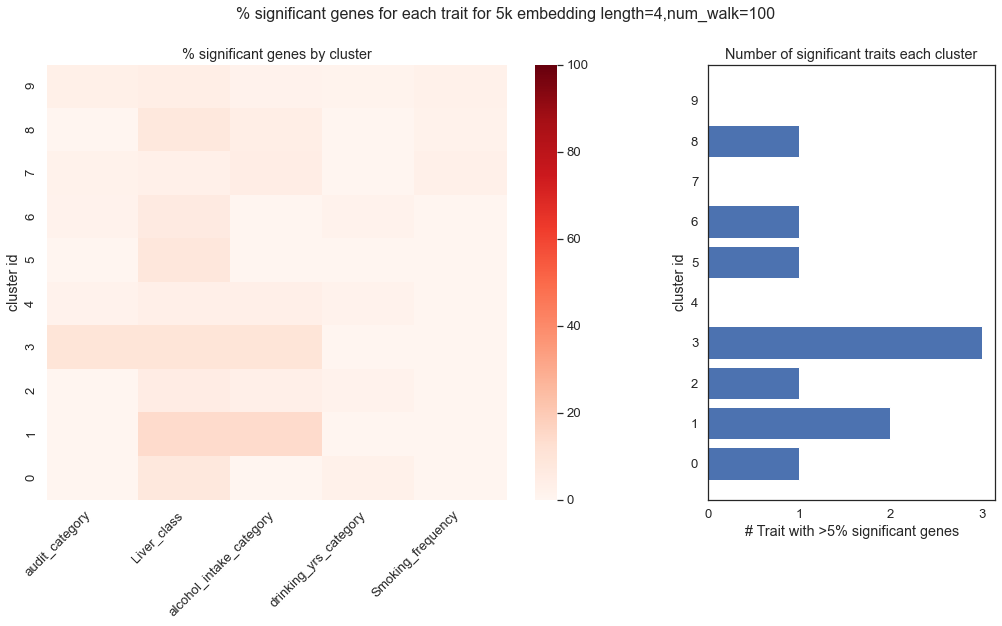

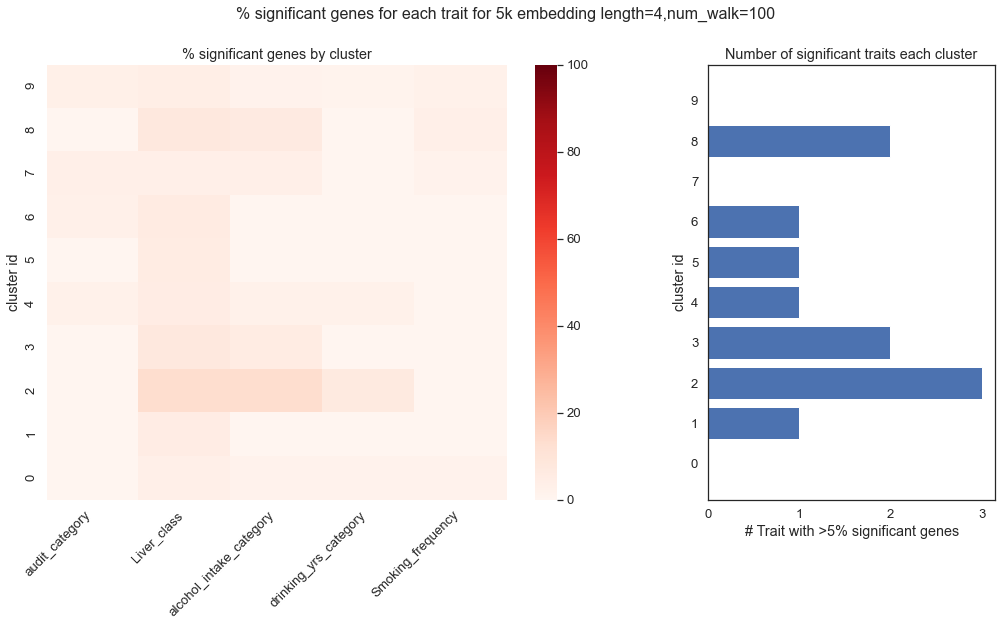

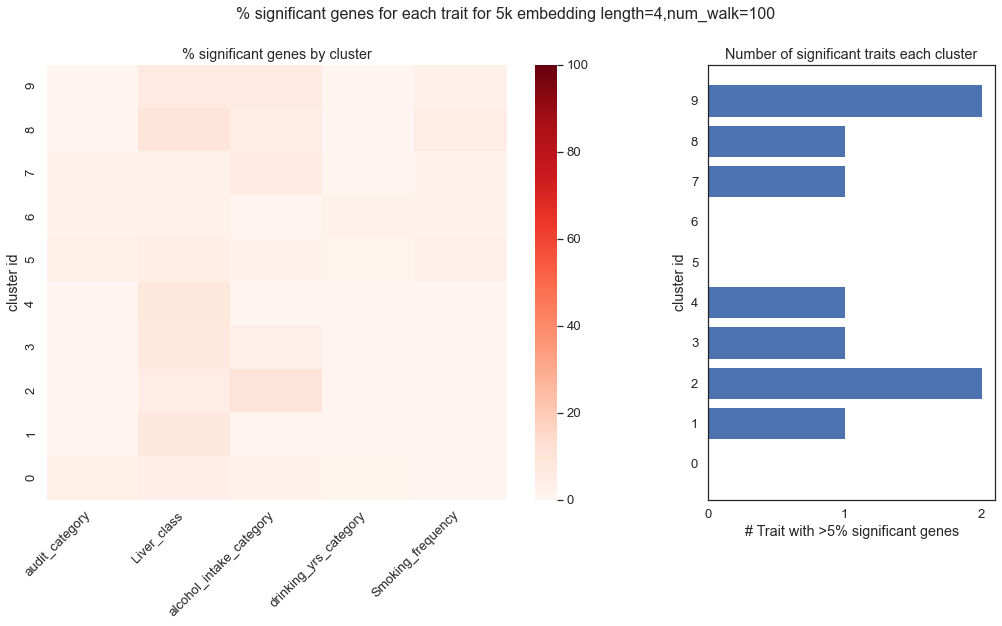

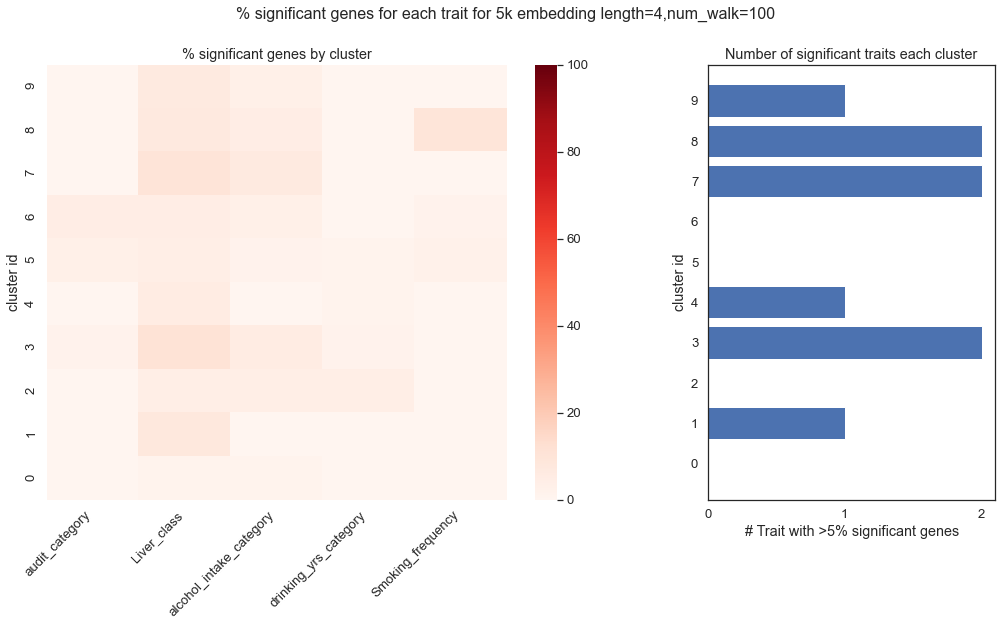

In [47]:
for i in range(9):
    plot_sig_perc(kmeans_list[i], 'kmean_label', '5k embedding length=4,num_walk=100')

## Evaluation 2.2: How much do cluster and phenotype correlation change when different subnetworks were used for embedding?

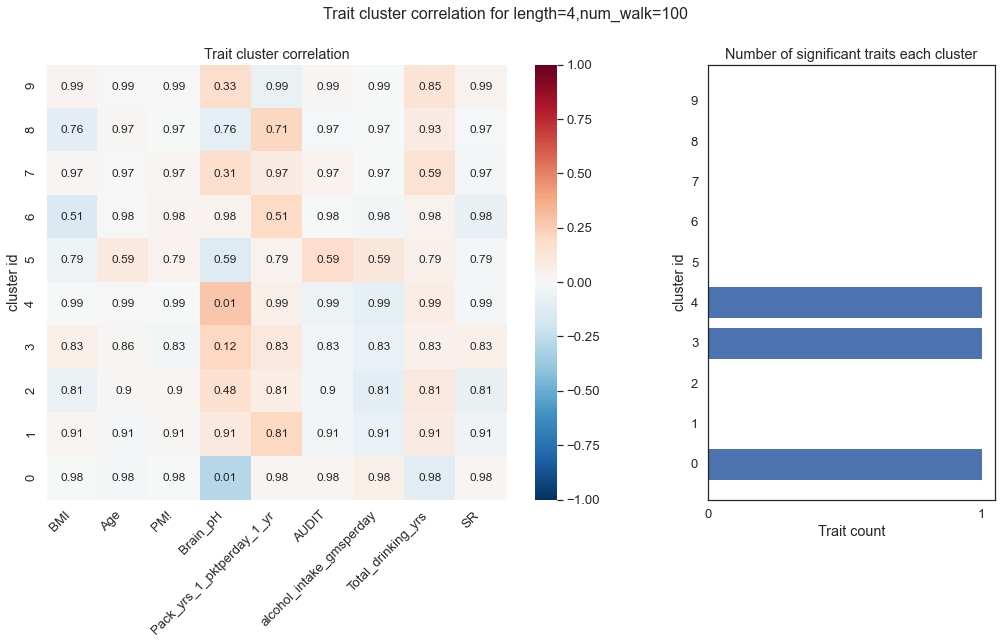

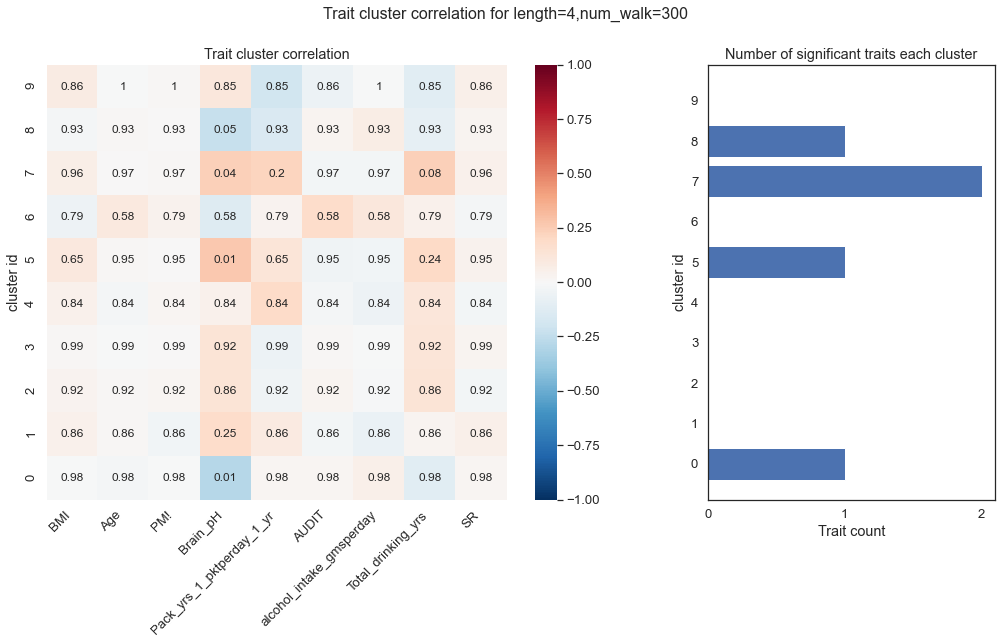

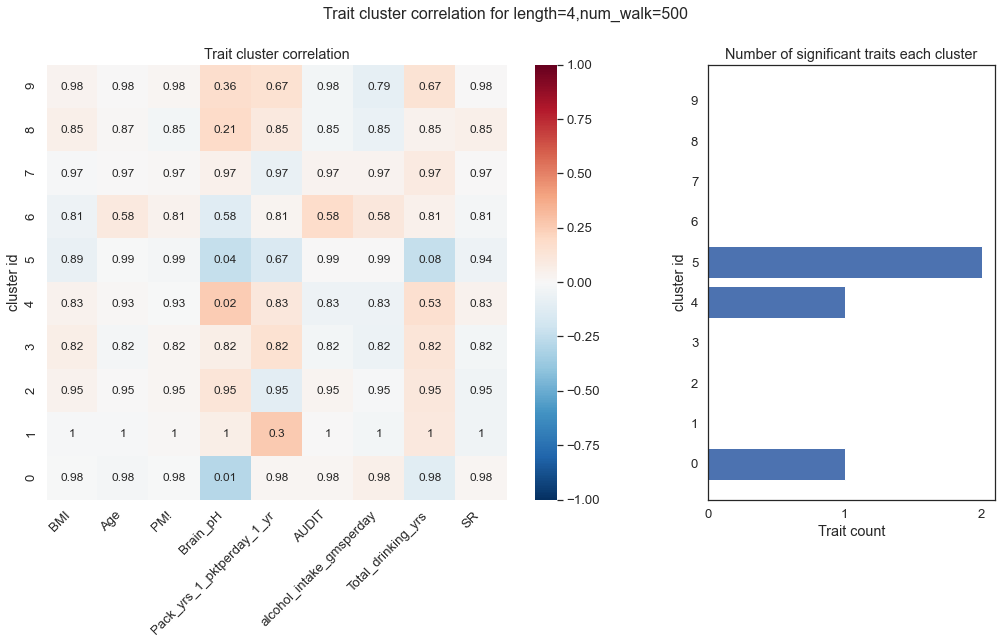

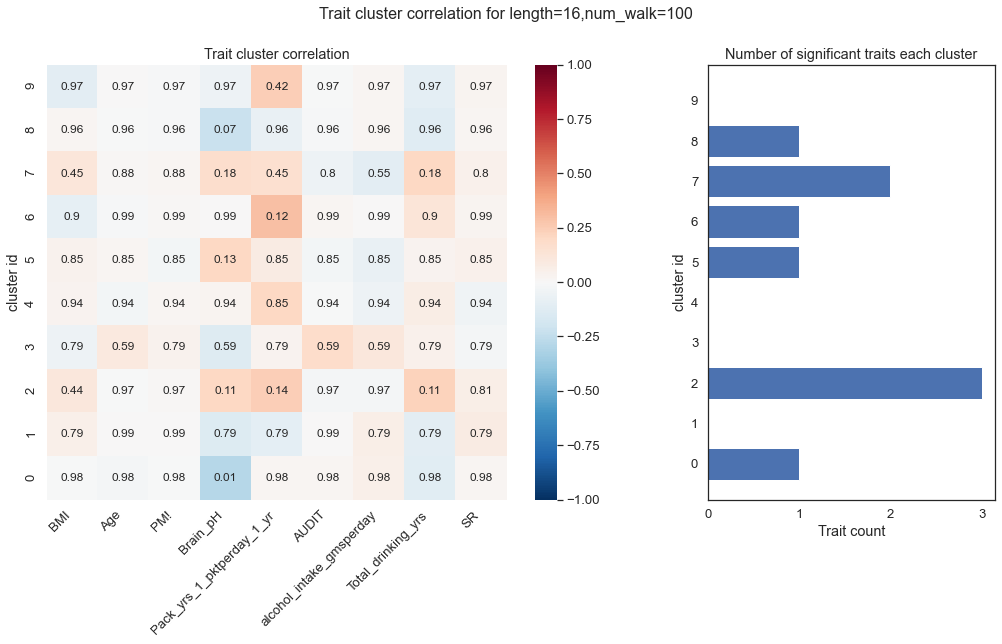

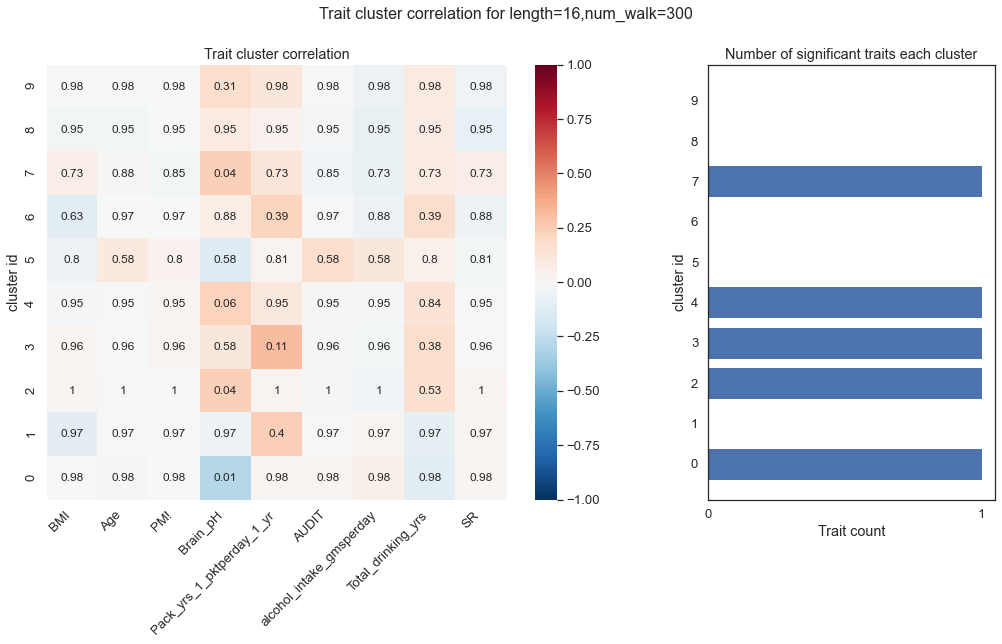

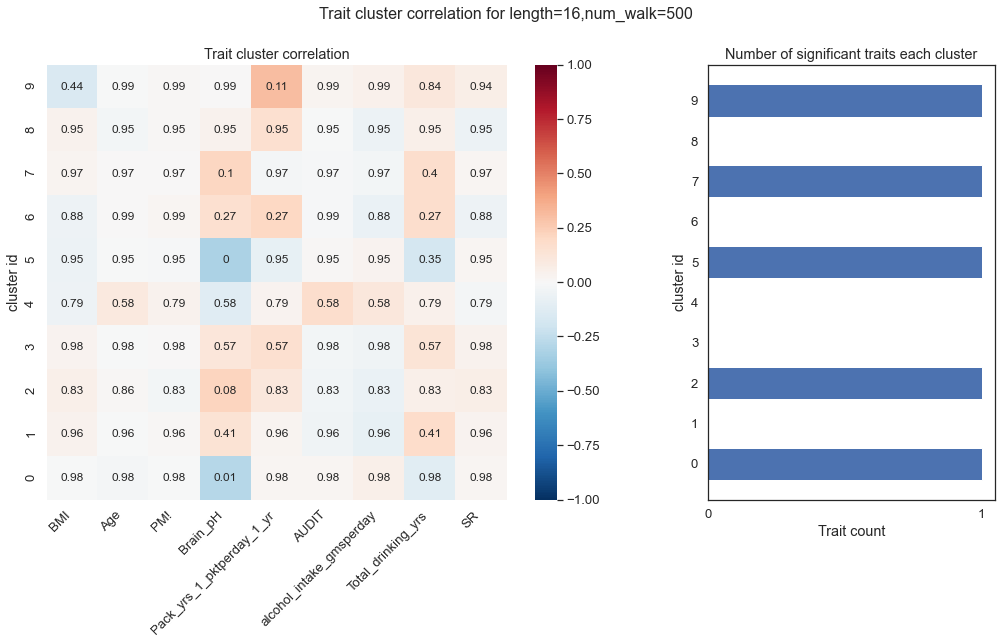

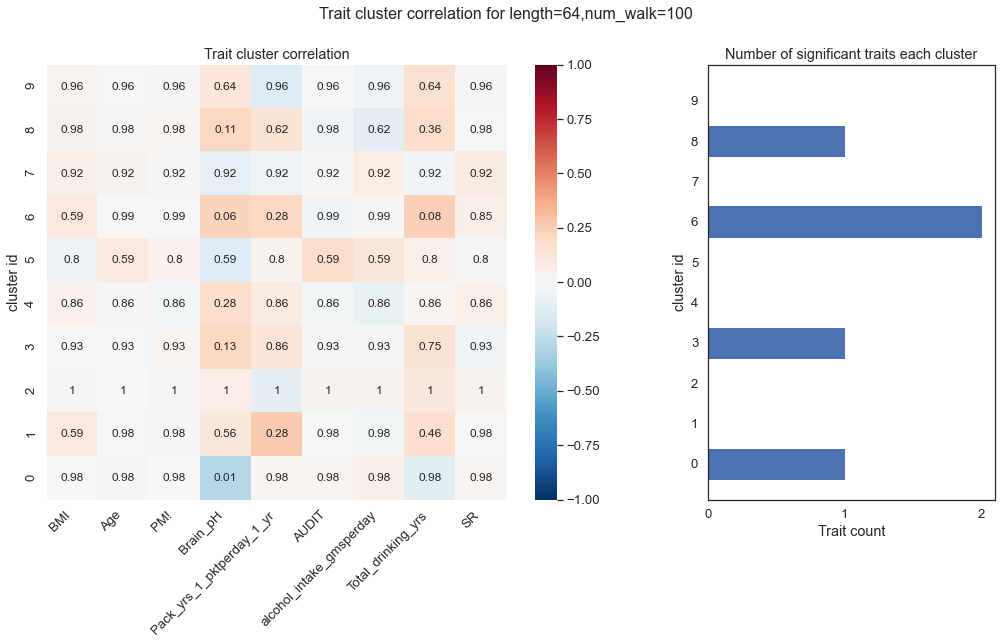

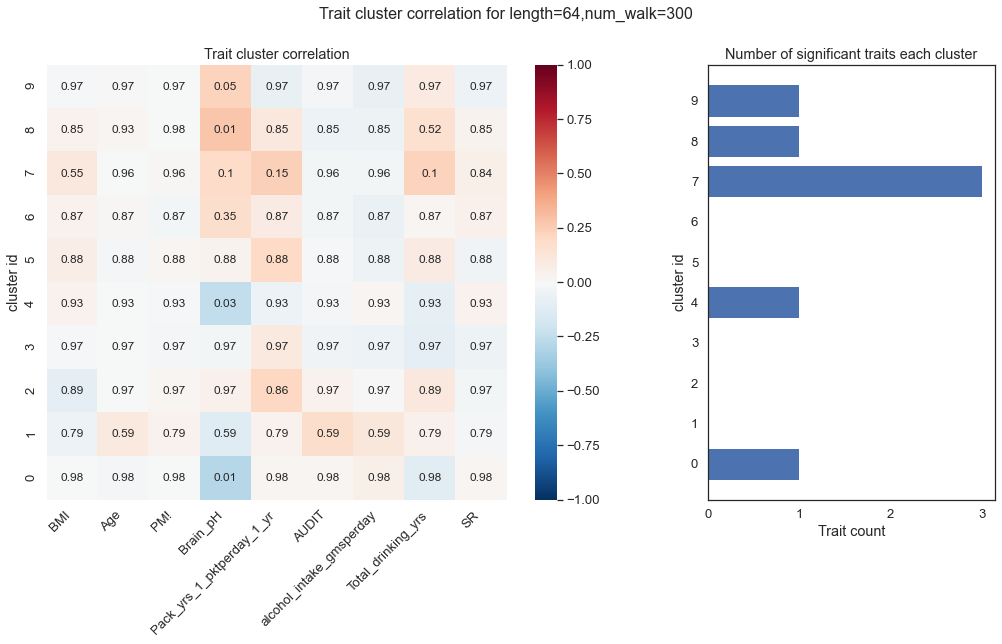

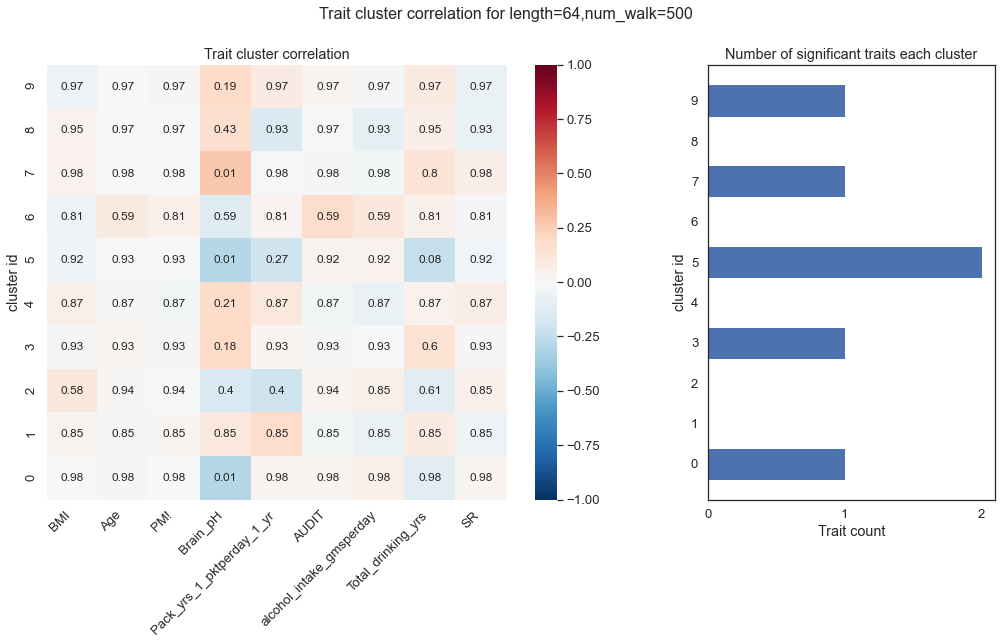

In [46]:
for i in range(9):
    cluster_phenotype_corr(kmeans_list[i], 'kmean_label', parameters[i])

# Evaluation 3: How do the n_clusters in K means affect cluster and phenotype correlation?

In [59]:
# using the embeddings from 5k edges as an example, but the same method could be applied to any embedding 
kmeans_test = []
emb = pd.read_csv('embedded_len16_walk100_0.24.csv', index_col = 0)
for n in [5,10,20]:
    kmeans_test.append(run_kmeans(emb, n))

## Evaluation 3.1: How much do % significant genes change in each cluster when different clusters were used for k means?

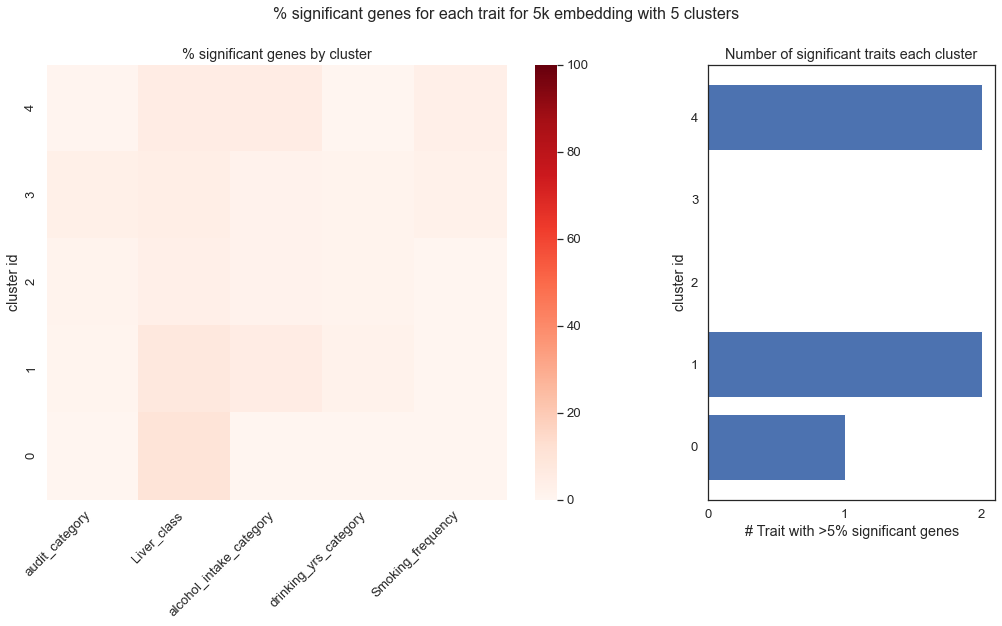

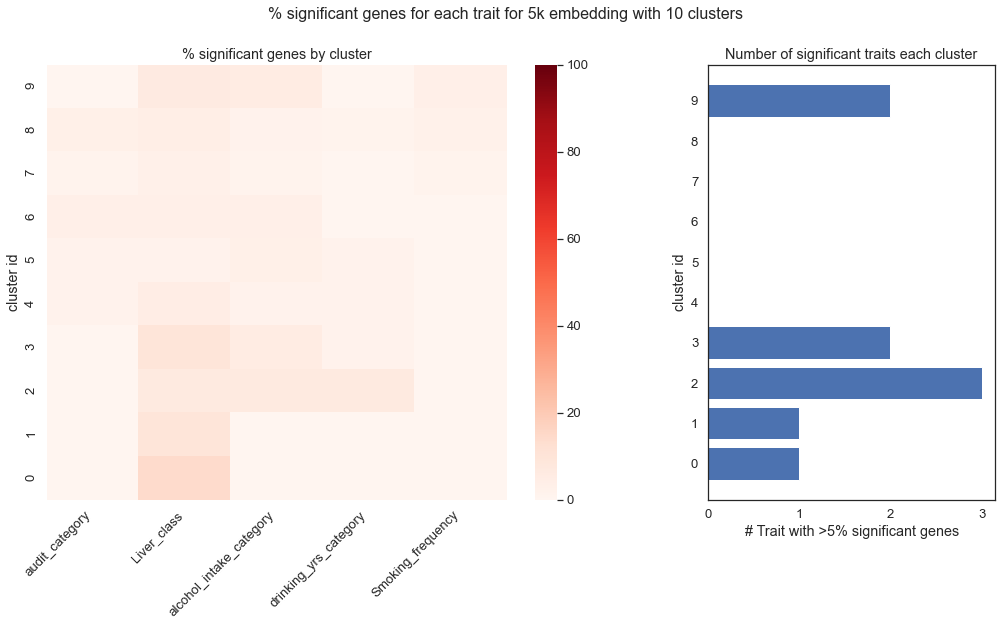

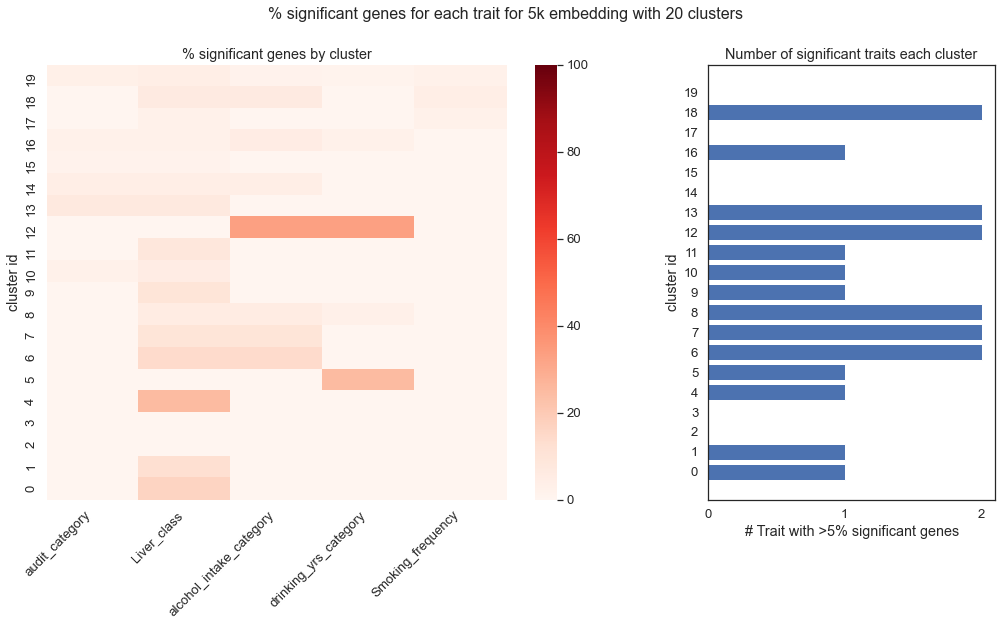

In [62]:
# This takes like 1 hour to run
n_list = [5,10,20]
for i in range(3):
    plot_sig_perc(kmeans_test[i], 'kmean_label', f'5k embedding with {n_list[i]} clusters')

## Evaluation 3.2: How much do cluster and phenotype correlation change when different clusters were used for k means?

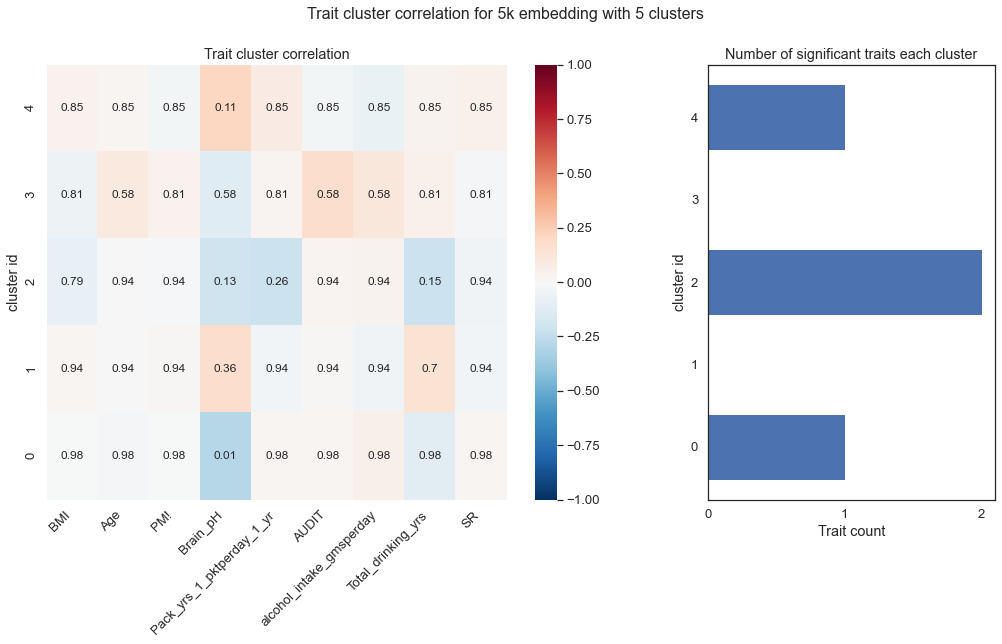

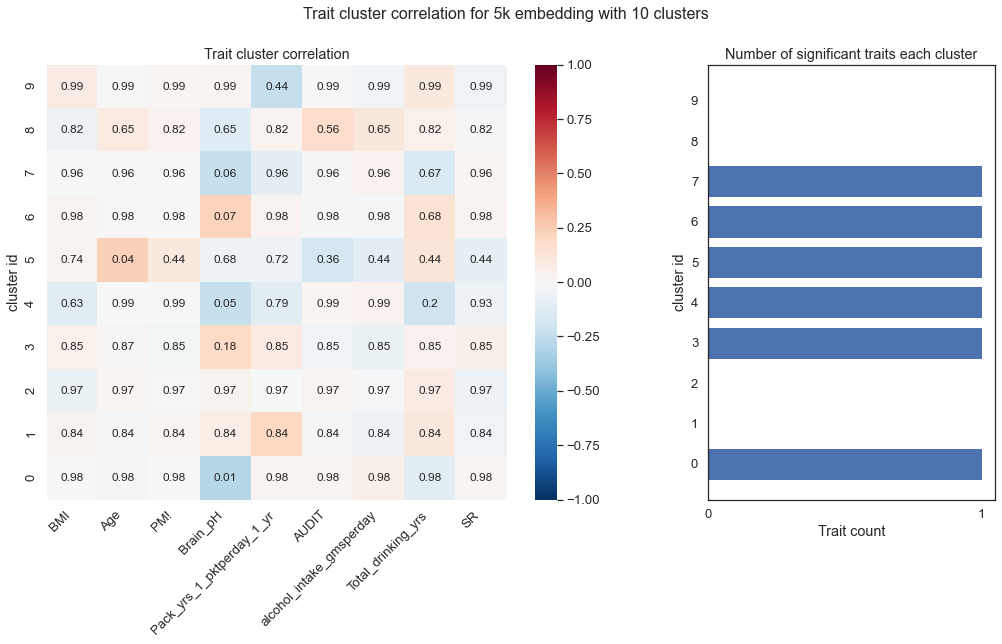

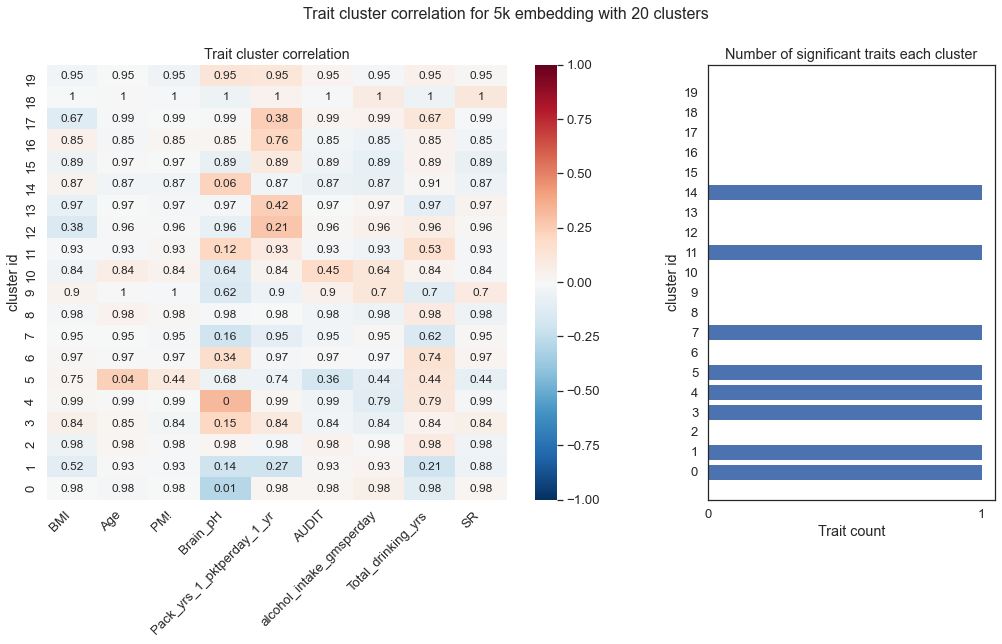

In [61]:
for i in range(3):
    cluster_phenotype_corr(kmeans_test[i], 'kmean_label', f'5k embedding with {n_list[i]} clusters')